#### Exercise 1 - Kaggle Big Dataset - Reviews

### Important Libraries

In [169]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml


#sklearn
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer,balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
    
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



### Loading the data

In [170]:
# train data
reviews_train = pd.read_csv('data/reviews/amazon_review_ID.shuf.lrn.csv')

#test data

reviews_test = pd.read_csv('data/reviews/amazon_review_ID.shuf.tes.csv')


### Data Preprocessing and Exploration

In [171]:
# Number of samples and number of attributes
num_samples = reviews_train.shape[0]
num_attributes = reviews_train.shape[1] - 1 # last one is the class annotation
print("The number of samples is: ", str(num_samples))
print("The number of attributes is: ", str(num_attributes))

The number of samples is:  750
The number of attributes is:  10001


In [172]:
reviews_train

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,14,9,8,12,7,4,5,3,2,...,0,1,0,1,0,1,1,0,0,Grove
1,1,12,3,8,6,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,Chell
2,2,17,5,7,12,8,3,0,3,2,...,0,1,0,0,0,0,1,0,0,Auken
3,3,9,6,10,6,4,7,7,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,4,8,4,5,5,1,7,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,745,9,4,3,4,6,7,2,1,0,...,1,1,1,2,0,0,0,0,0,Engineer
746,746,13,6,1,13,2,5,7,5,3,...,0,0,0,1,0,0,0,1,0,Morrison
747,747,19,9,12,3,9,7,5,2,5,...,1,0,0,0,0,0,0,1,0,CFH
748,748,5,14,16,7,2,12,9,3,7,...,0,0,0,0,0,0,0,3,0,Brown


In [173]:
# checking for null values
# reviews_train.isna().sum()

In [174]:
#print number of unknown values:
num_unknown = 0
for n in reviews_train.columns:
  num_unknown_per_feature = reviews_train.loc[:,n].isin(['unknown']).sum(axis=0)
  num_unknown += num_unknown_per_feature
  print(n, ':', num_unknown_per_feature)
print('total unknown:', num_unknown)



ID : 0
V1 : 0
V2 : 0
V3 : 0
V4 : 0
V5 : 0
V6 : 0
V7 : 0
V8 : 0
V9 : 0
V10 : 0
V11 : 0
V12 : 0
V13 : 0
V14 : 0
V15 : 0
V16 : 0
V17 : 0
V18 : 0
V19 : 0
V20 : 0
V21 : 0
V22 : 0
V23 : 0
V24 : 0
V25 : 0
V26 : 0
V27 : 0
V28 : 0
V29 : 0
V30 : 0
V31 : 0
V32 : 0
V33 : 0
V34 : 0
V35 : 0
V36 : 0
V37 : 0
V38 : 0
V39 : 0
V40 : 0
V41 : 0
V42 : 0
V43 : 0
V44 : 0
V45 : 0
V46 : 0
V47 : 0
V48 : 0
V49 : 0
V50 : 0
V51 : 0
V52 : 0
V53 : 0
V54 : 0
V55 : 0
V56 : 0
V57 : 0
V58 : 0
V59 : 0
V60 : 0
V61 : 0
V62 : 0
V63 : 0
V64 : 0
V65 : 0
V66 : 0
V67 : 0
V68 : 0
V69 : 0
V70 : 0
V71 : 0
V72 : 0
V73 : 0
V74 : 0
V75 : 0
V76 : 0
V77 : 0
V78 : 0
V79 : 0
V80 : 0
V81 : 0
V82 : 0
V83 : 0
V84 : 0
V85 : 0
V86 : 0
V87 : 0
V88 : 0
V89 : 0
V90 : 0
V91 : 0
V92 : 0
V93 : 0
V94 : 0
V95 : 0
V96 : 0
V97 : 0
V98 : 0
V99 : 0
V100 : 0
V101 : 0
V102 : 0
V103 : 0
V104 : 0
V105 : 0
V106 : 0
V107 : 0
V108 : 0
V109 : 0
V110 : 0
V111 : 0
V112 : 0
V113 : 0
V114 : 0
V115 : 0
V116 : 0
V117 : 0
V118 : 0
V119 : 0
V120 : 0
V121 : 0
V122 : 0
V12

In [175]:
# reviews_train.dtypes

In [176]:
# # Plotting the categorical variables
# categorical_columns = reviews_train.columns.difference(['ID','Class'])

In [177]:
# plt.figure(figsize=(20,30))
# for i,column in enumerate(categorical_columns):
#     plt.subplot(4, 4, i+1)
#     sns.histplot(x=congress_train[column],hue =congress_train['class'],multiple = 'stack')
#     plt.xlabel(column)
#     plt.xticks(rotation=90)
# plt.suptitle("Distribution between the 2 classes ", fontsize=20)
# plt.show()

##### Preparing data for model fitting

In [178]:
# List of possible classes
print("List of unique class labels:",'\n',reviews_train['Class'].unique())
print('\n')
print('Number of unique class labels','\n',reviews_train['Class'].nunique())


List of unique class labels: 
 ['Grove' 'Chell' 'Auken' 'Davisson' 'Vision' 'Harp' 'Calvinnme' 'Vernon'
 'Cutey' 'Hayes' 'Robert' 'Wilson' 'Sherwin' 'Lee' 'Mahlers2nd' 'Merritt'
 'Power' 'Lovitt' 'Peterson' 'Nigam' 'Agresti' 'Comdet' 'Blankenship'
 'Chandler' 'Walters' 'Mark' 'Neal' 'Brody' 'Mitchell' 'Taylor' 'Shea'
 'Chachra' 'Messick' 'Kolln' 'Ashbacher' 'Johnson' 'Koenig' 'Corn' 'Brown'
 'Riley' 'Engineer' 'Lawyeraau' 'Janson' 'McKee' 'Dent' 'Cholette'
 'Goonan' 'CFH' 'Bukowsky' 'Morrison']


Number of unique class labels 
 50


Observations:
- As mentioned above, there are 50 unique classes in our data. We decided to factorize the `class` column before fitting the model.

In [179]:
reviews_train['class'] = reviews_train['Class'].factorize()[0]

- Splitting the data into train and test set

In [216]:
X = reviews_train.drop(['class','Class','ID'], axis=1)
Y = reviews_train['class']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 1234,stratify=Y)

#### Dimensionality Reduction


- This dataset contains around 1001 features and only 750 data points. This calls for dimensionality reduction techniques. Therefore,we implemented Principal Components Analysis.

##### Principal Component Analysis

In [189]:
pca = PCA()
X_pca = pca.fit(X_train, y_train)

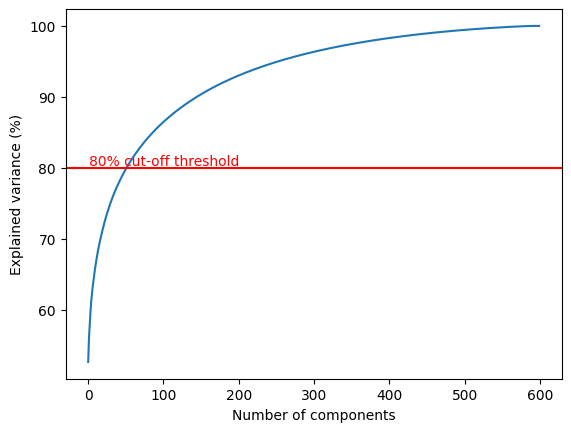

In [190]:
# plot a scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.axhline(y=80, color='r', linestyle='-')
plt.text(0.5, 80, '80% cut-off threshold', color = 'red', fontsize=10,verticalalignment = 'bottom')
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

Observations:
- We decided to keep only those variables that cover 80% of the variance in our data. That means our number of components would be 50, which would be a huge reduction from 1001 features we initially had.

- Therefore, first, we are going to transform our `X_train` and `X_test`.

In [217]:
_sc = StandardScaler()
_pca = PCA(n_components =50)
X_train_pca = _pca.fit_transform(_sc.fit_transform(X_train),y_train)
X_test_pca = _pca.transform(_sc.transform(X_test))

#### Decision Tree

##### Tree 1

In [205]:
tree_1 = tree.DecisionTreeClassifier(random_state=1)
tree_1.fit(X_train_pca,y_train)


DecisionTreeClassifier(random_state=1)

In [206]:
def evaluate(model,X_train = X_train_pca,X_test = X_test_pca,y_train = y_train,y_test=y_test):
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # accuracy
    print("#"*20)
    print("Accuracy on train: {:.2f} %".format(accuracy_score(y_true = y_train, y_pred = y_train_predict)*100))
    print("Accuracy on test: {:.2f} %".format(accuracy_score(y_test, y_test_predict)*100))
    print("#"*20)
    print("Recall on train: {:.2f} %".format(recall_score(y_true = y_train, y_pred = y_train_predict,average = 'macro')*100))
    print("Recall on test: {:.2f} %".format(recall_score(y_true = y_test, y_pred = y_test_predict,average = 'macro')*100))
    print("#"*20)
    print("Precision on train: {:.2f} %".format(precision_score(y_true = y_train, y_pred = y_train_predict, average = 'macro', zero_division=0)*100))
    print("Precision on test: {:.2f} %".format(precision_score(y_true = y_test, y_pred = y_test_predict, average = 'macro', zero_division=0)*100))
      


evaluate(tree_1)

####################
Accuracy on train: 100.00 %
Accuracy on test: 15.33 %
####################
Recall on train: 100.00 %
Recall on test: 14.00 %
####################
Precision on train: 100.00 %
Precision on test: 17.74 %


In [207]:
features = X_train.columns
def plottree(model):
    plt.figure(figsize=(20,30))
    plot = tree.plot_tree(model,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
    for o in plot:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()


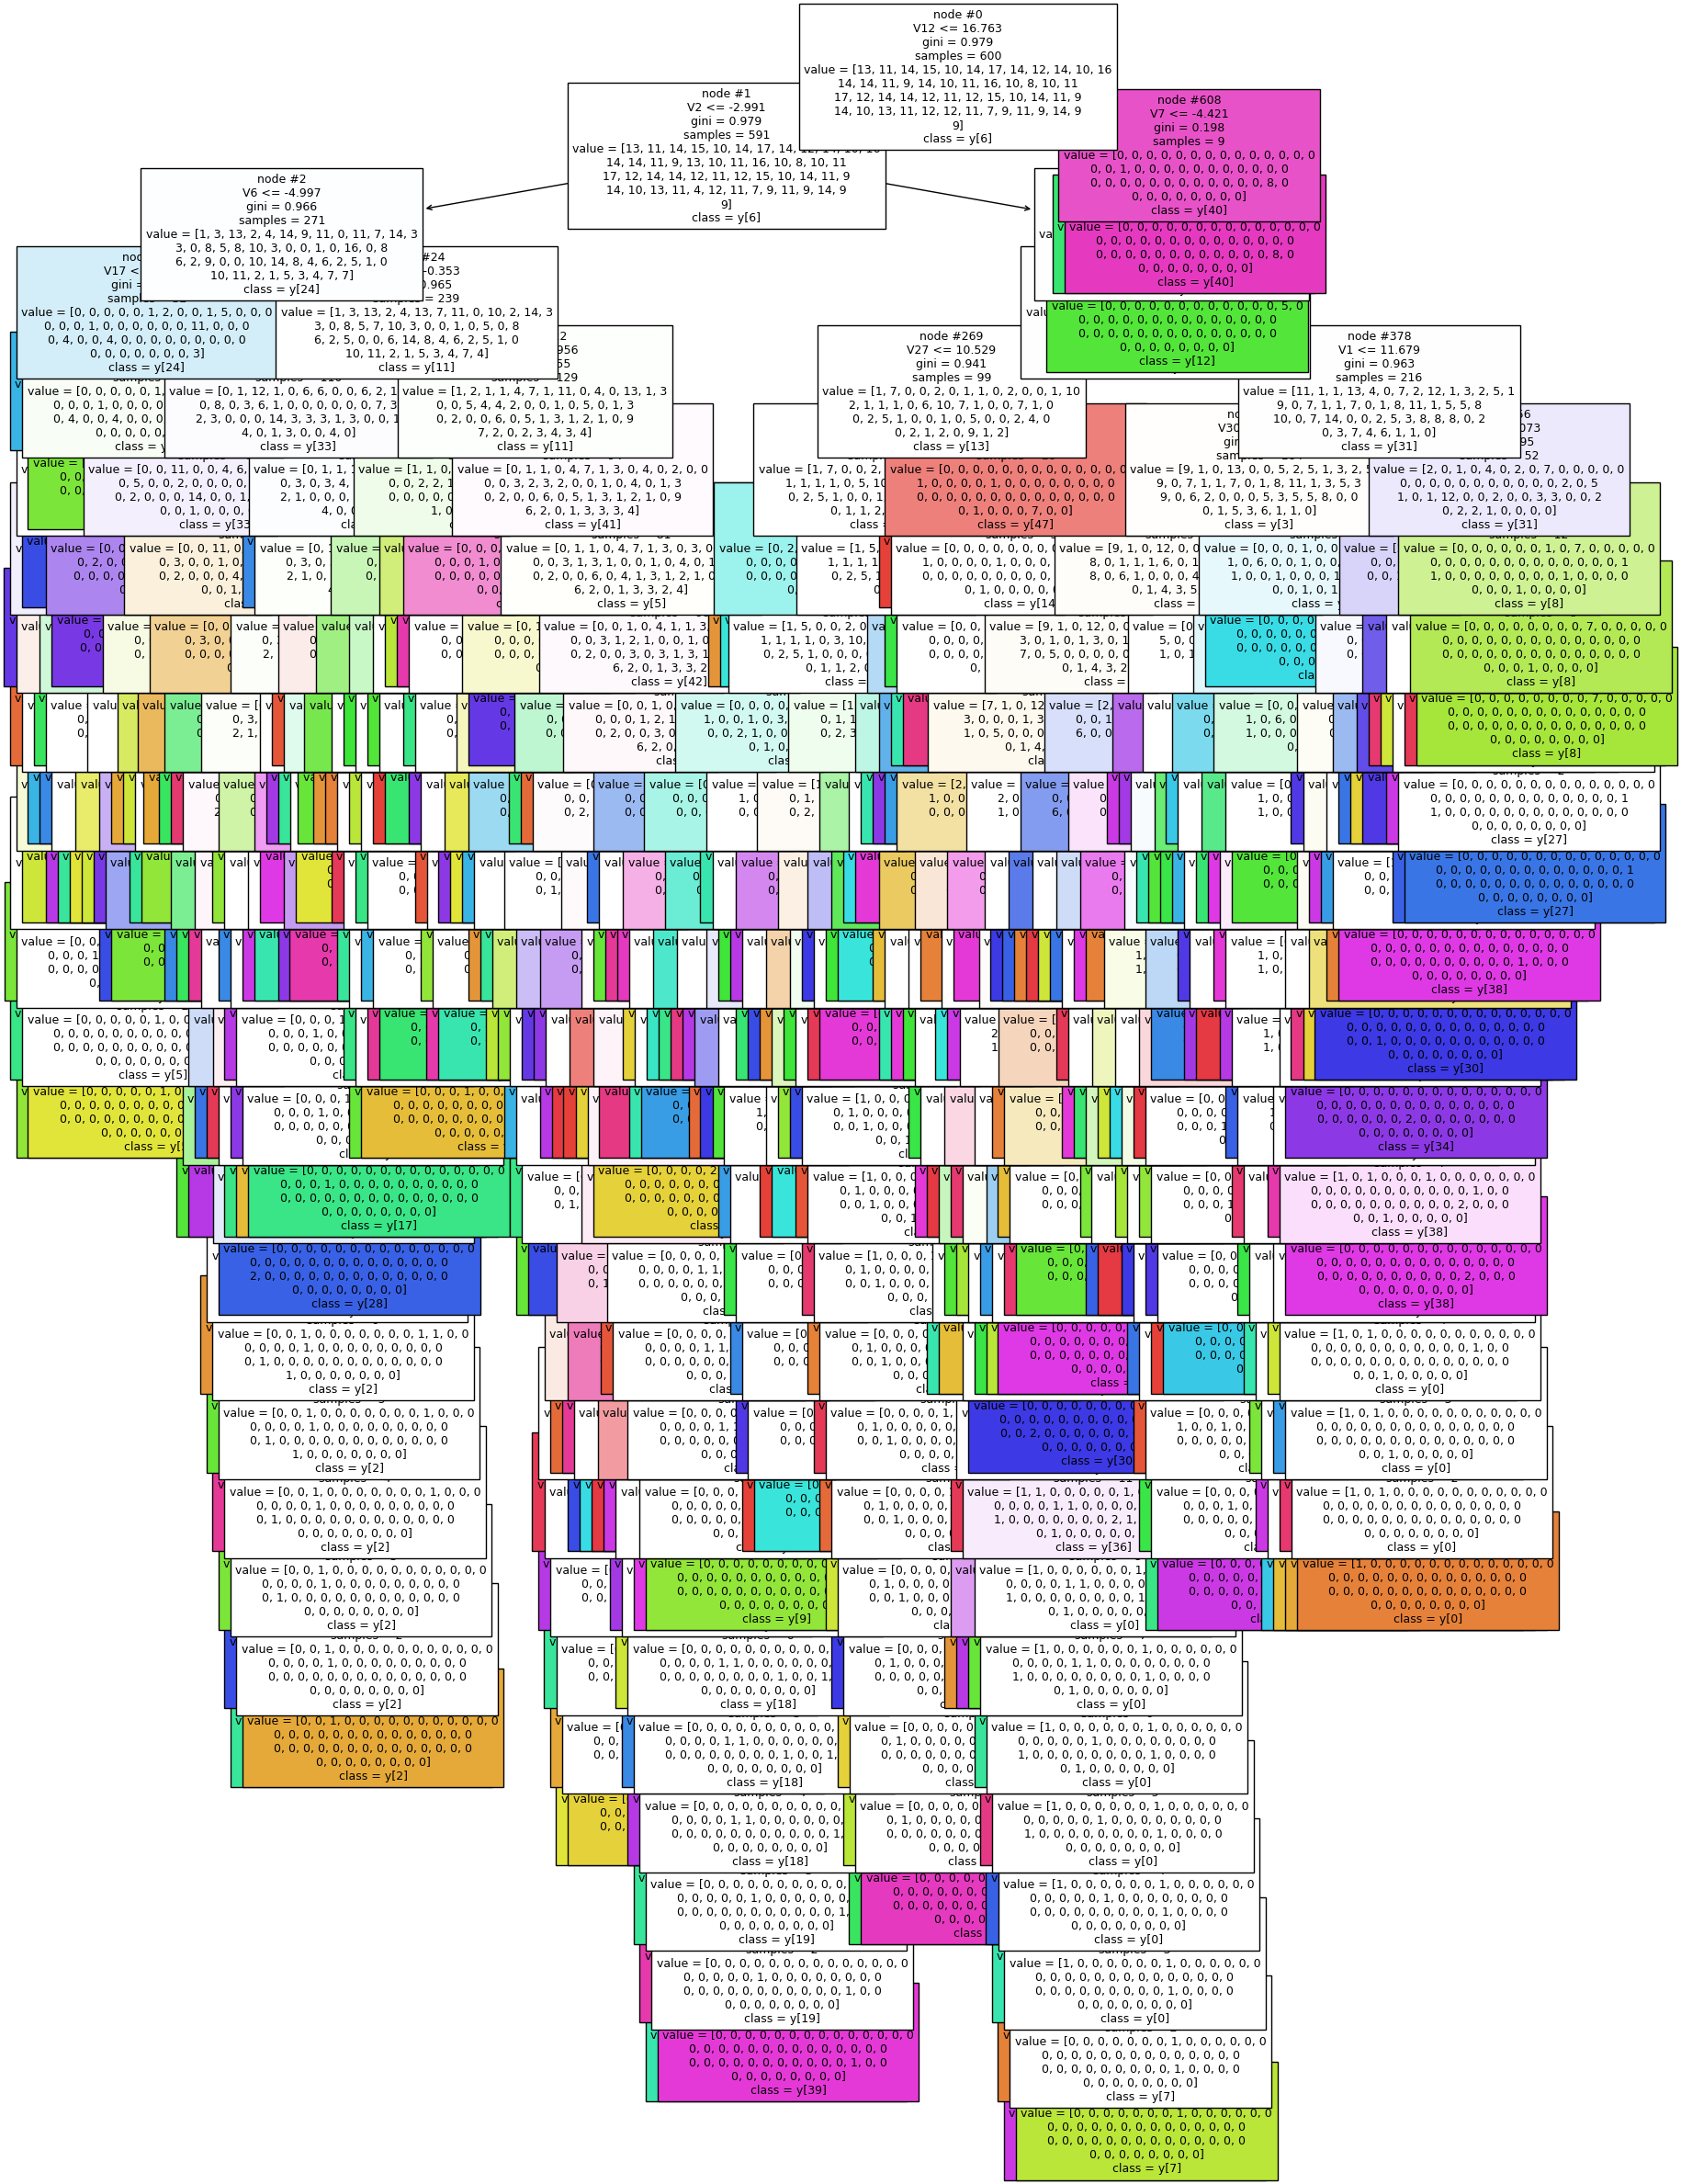

In [208]:
plottree(tree_1)

In [120]:
def plot_features(model):
    feat_dict= {}
    for col, val in sorted(zip(features, model.feature_importances_),key=lambda x:x[1],reverse=True):
        feat_dict[col]=val
    feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
    values = feat_df.Importance    
    idx = feat_df.Feature
    plt.figure(figsize=(10,8))
    clrs = ['navy']
    sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict client subscription')
    plt.show()

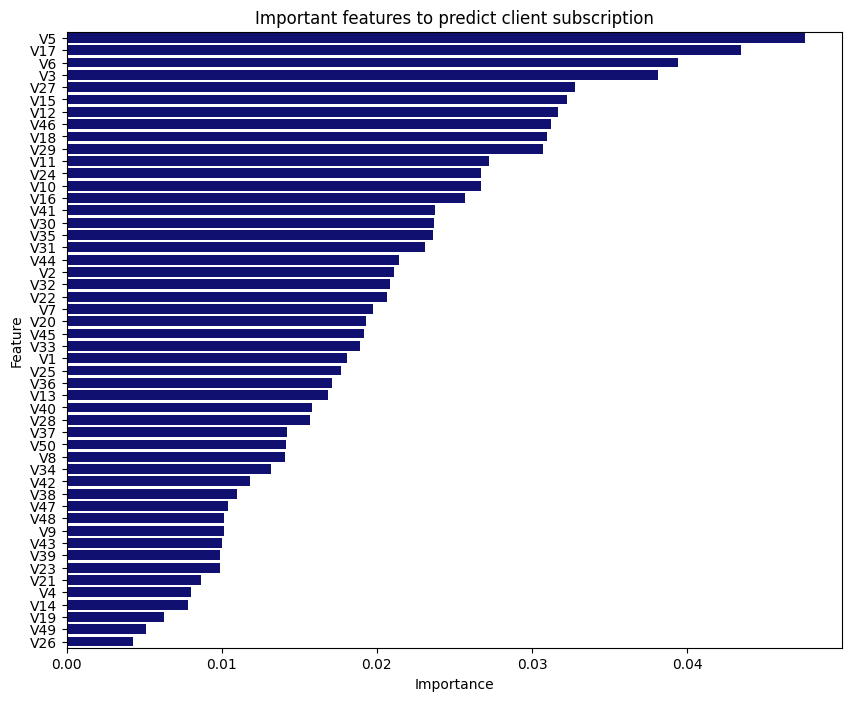

In [209]:
plot_features(tree_1)

Observations:
- Tree 1 has a perfect score on train set which surely suggests that this model is quite overfitted. On test set, it does not perform very well and has an accuracy of 15%. 

#### Tree Model 2 with best features

In [218]:
tree_2 = tree.DecisionTreeClassifier(random_state = 1)

tree_2.fit(X_train_pca[:,: 35],y_train)

DecisionTreeClassifier(random_state=1)

In [219]:
evaluate(tree_2,X_train = X_train_pca[:,:35],X_test = X_test_pca[:,:35])

####################
Accuracy on train: 100.00 %
Accuracy on test: 16.00 %
####################
Recall on train: 100.00 %
Recall on test: 14.17 %
####################
Precision on train: 100.00 %
Precision on test: 14.32 %


Observations:

- Feature selection led to an improvement of the test accuracy but the train accuracy is still quite high.

##### One vs One Classifier with Decision Tree

- Since we are dealing with a multiclass classification problem, we decided to implementent a OnevsOne classifier. This classifier trains multiple binary classifiers and each of them has the function of distinguishing between two classes. In the end the prediction is made by averaging vote among the predicted label from all the binary classifiers.



In [220]:
tree_3 = tree.DecisionTreeClassifier(random_state=1)

tree_ovo = OneVsOneClassifier(tree_3)

In [221]:
tree_ovo.fit(X_train_pca,y_train)

OneVsOneClassifier(estimator=DecisionTreeClassifier(random_state=1))

In [222]:
evaluate(tree_ovo)

####################
Accuracy on train: 49.50 %
Accuracy on test: 19.33 %
####################
Recall on train: 49.01 %
Recall on test: 18.17 %
####################
Precision on train: 51.68 %
Precision on test: 25.61 %


Observations:
- Using One vs One classifier has improved the performance of the decision tree. The test accuracy now amounts to 19.33%.

####  Hyperparameter tuning and  Kfold Cross Validation

In [242]:
# Define the decision tree model
dt = tree.DecisionTreeClassifier(random_state=1)

# Define the OvO classifier with the decision tree model
ovo = OneVsOneClassifier(dt)

# Define the hyperparameter grid for the decision tree
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': [4, 6, 8, 10,12,15],}

# Define the hyperparameter grid for the OvO classifier
ovo_params = {'estimator__criterion': ['gini', 'entropy'],
              'estimator__max_depth': [4, 6, 8, 10,12,15],}

              
kf = KFold(n_splits= 10, shuffle=True, random_state=1)


grid = GridSearchCV(estimator=ovo, param_grid=ovo_params, cv=kf)

grid = grid.fit(X_train_pca,y_train)

In [243]:
best_tree_pca = grid.best_estimator_
best_tree_pca
# DecisionTreeClassifier(max_depth=4, random_state=1)

OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1))

In [244]:
best_tree_pca.fit(X_train_pca,y_train)
evaluate(best_tree_pca)

####################
Accuracy on train: 49.50 %
Accuracy on test: 19.33 %
####################
Recall on train: 49.01 %
Recall on test: 18.17 %
####################
Precision on train: 51.68 %
Precision on test: 25.61 %


Observations:
- Fitting the tree with the best parameter estimation resulted in a decrease of overfit as the train accuracy amounts to 49.50% now and in test accuracy of 19.33%.

##### Cost Complexity Pruning

In [230]:
# prune the tree with cost complexity pruning — Alpha
path = tree.DecisionTreeClassifier(random_state = 1).cost_complexity_pruning_path(X_train_pca, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

In [233]:

mean, std = [], []
for i in alphas:
 tree_ = tree.DecisionTreeClassifier(ccp_alpha=i, random_state=0)
 scores = cross_val_score(tree_, X_train_pca, y_train, cv=5)
 mean.append(scores.mean())
 std.append(scores.std())
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
eva_df = pd.DataFrame({'alpha': alphas, 'mean_score': mean, 'std': std})
eva_df = eva_df.sort_values(['alpha'], ascending = True)
eva_df.head(10)

,alpha,mean_score,std
0,0.000000,0.136667,0.025604
9,0.001667,0.136667,0.025604
7,0.001667,0.136667,0.025604
6,0.001667,0.136667,0.025604
5,0.001667,0.136667,0.025604
8,0.001667,0.136667,0.025604
3,0.001667,0.136667,0.025604
2,0.001667,0.136667,0.025604
1,0.001667,0.136667,0.025604
4,0.001667,0.136667,0.025604


In [239]:
eva_df[eva_df['mean_score']==eva_df['mean_score'].max()]

,alpha,mean_score,std
172,0.006314,0.146667,0.006667
173,0.006375,0.146667,0.006667


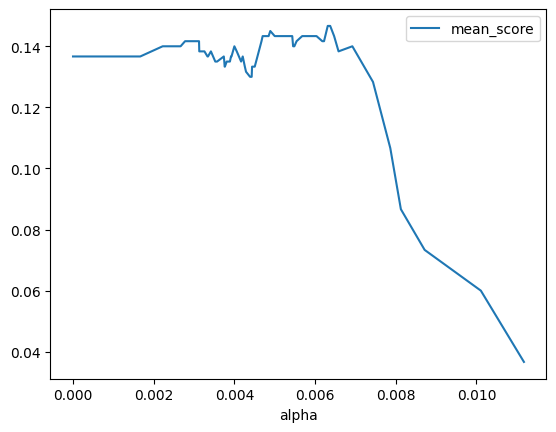

In [235]:
eva_df.plot(x = 'alpha',y = 'mean_score')
plt.show()

In [240]:
tree_pruned = tree.DecisionTreeClassifier(random_state=1,ccp_alpha = 0.006314)

tree_ovo_pruned = OneVsOneClassifier(tree_3)

tree_ovo_pruned.fit(X_train_pca,y_train)

evaluate(tree_ovo_pruned)

####################
Accuracy on train: 49.50 %
Accuracy on test: 19.33 %
####################
Recall on train: 49.01 %
Recall on test: 18.17 %
####################
Precision on train: 51.68 %
Precision on test: 25.61 %


Observations:

- According to the plot above, the most optimal alpha is 0.006314. The pruned tree does not offer an improved performance.

##### Random Forest and OvO Classifier

In [245]:
rf_1 = RandomForestClassifier(random_state=1)
rf_ovo_1 = OneVsOneClassifier(rf_1)

In [246]:
rf_ovo_1.fit(X_train_pca,y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(random_state=1))

In [249]:
evaluate(rf_ovo_1)

####################
Accuracy on train: 62.50 %
Accuracy on test: 24.67 %
####################
Recall on train: 60.92 %
Recall on test: 22.83 %
####################
Precision on train: 68.64 %
Precision on test: 27.01 %


In [251]:
rf_1.fit(X_train_pca,y_train)

evaluate(rf_1)

####################
Accuracy on train: 82.83 %
Accuracy on test: 28.67 %
####################
Recall on train: 81.99 %
Recall on test: 26.50 %
####################
Precision on train: 86.09 %
Precision on test: 29.30 %


Observations:
- The first OvO random forest model led to an improvement of the test accuracy to 24%. However, the overfit on train is still quite high. On the other side, a random forest only model has a higher accuracy when comparet to OvO random forest.

##### Balanced Random Forest 2 

In [248]:
rf_2 = RandomForestClassifier(random_state = 1,class_weight = 'balanced')
rf_ovo_2 = OneVsOneClassifier(rf_2)
rf_ovo_2.fit(X_train_pca,y_train)

OneVsOneClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=1))

In [250]:
evaluate(rf_ovo_2)

####################
Accuracy on train: 61.50 %
Accuracy on test: 23.33 %
####################
Recall on train: 59.31 %
Recall on test: 21.83 %
####################
Precision on train: 70.22 %
Precision on test: 25.65 %


In [252]:
rf_2.fit(X_train_pca,y_train)
evaluate(rf_2)

####################
Accuracy on train: 87.17 %
Accuracy on test: 28.67 %
####################
Recall on train: 87.34 %
Recall on test: 26.83 %
####################
Precision on train: 89.64 %
Precision on test: 30.62 %


Observations:
- Unfortunately balanced random forest, did not bring much improvement in the performance.

##### Hyperparameter Tuning and KFold Cross Validation

In [264]:
params = {'n_estimators': [100, 200, 300,400,500,600, 1000],
'max_depth':[3,5,8,15,20,25,30,40,],
'bootstrap': [True,False],
'class_weight' : ['balanced',None]}

rf = RandomForestClassifier(random_state=1)

kf = KFold(n_splits= 10, shuffle=True, random_state=1)

rand_rf = RandomizedSearchCV(rf, param_distributions = params, cv=kf,n_iter = 1,random_state = 1,n_jobs = -1)

rand_rf = rand_rf.fit(X_train_pca,y_train)

In [265]:
rand_rf_best = rand_rf.best_estimator_

In [266]:
rand_rf_best.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, n_estimators=300,
                       random_state=1)

In [267]:
evaluate(rand_rf_best)

####################
Accuracy on train: 93.00 %
Accuracy on test: 32.67 %
####################
Recall on train: 92.88 %
Recall on test: 30.67 %
####################
Precision on train: 93.93 %
Precision on test: 33.07 %


Observations:
- The best results were achieved with the best combination for Random Forest.Train accuracy is 93% and test accuracy is 32.67%.

### k-NN Classifier
Starting with X_train and X_test, without applied dimensionality reduction 

In [12]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
493,7,5,8,5,1,1,0,4,6,1,...,1,0,0,0,0,0,0,1,0,0
219,12,14,5,4,7,5,6,3,2,4,...,0,0,0,0,0,0,0,0,0,0
360,7,11,6,2,8,2,5,4,1,3,...,0,0,1,0,1,1,0,0,2,0
283,6,9,6,10,9,2,2,6,3,3,...,0,0,0,0,0,0,1,0,0,0
705,14,3,7,6,8,6,1,3,3,2,...,0,0,0,0,0,0,0,0,0,0


Since k-NN classifier relies on distance, scaling (Z-score standardisation) is a must!
let's ensure that all variables have mean of 0 and standard deviation of 1.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

print('TRAINING')
print('Original data:')
print('Mean:')
print(X_train.mean(axis=0))
print('Std:')
print(X_train.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_train_standardized.mean(axis=0))
print('Std:')
print(X_train_standardized.std(axis=0))

print('#'*100)


print('TESTING')
print('Original data:')
print('Mean:')
print(X_test.mean(axis=0))
print('Std:')
print(X_test.std(axis=0))
print()
print('Standardized data:')
print('Mean:')
print(X_test_standardized.mean(axis=0))
print('Std:')
print(X_test_standardized.std(axis=0))

X_train = X_train_standardized
X_test = X_test_standardized

TRAINING
Original data:
Mean:
V1        12.043333
V2         7.811667
V3         6.783333
V4         6.711667
V5         6.203333
            ...    
V9996      0.176667
V9997      0.208333
V9998      0.208333
V9999      0.230000
V10000     0.235000
Length: 10000, dtype: float64
Std:
V1        5.609864
V2        3.731318
V3        3.386567
V4        3.836195
V5        3.251093
            ...   
V9996     0.457315
V9997     0.481647
V9998     0.488530
V9999     0.494139
V10000    0.583389
Length: 10000, dtype: float64

Standardized data:
Mean:
[ 7.10542736e-17  3.55271368e-17  3.55271368e-17 ... -2.96059473e-18
  1.18423789e-17  8.28966525e-17]
Std:
[1. 1. 1. ... 1. 1. 1.]
####################################################################################################
TESTING
Original data:
Mean:
V1        12.033333
V2         7.380000
V3         6.620000
V4         6.733333
V5         6.046667
            ...    
V9996      0.220000
V9997      0.293333
V9998      0.153333
V9999   

In [14]:
def knn_evaluate(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))

    

In [15]:
# 1st model
from sklearn.neighbors import KNeighborsClassifier
k = 50
knn_1 = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_1.fit(X_train, y_train)

knn_evaluate(knn_1)

########################################
Accuracy on train:  1.0
Accuracy on test:  0.10666666666666667
########################################
Recall on train:  1.0
Recall on test:  0.09833333333333333
########################################
Precision on train:  1.0
Precision on test:  0.11919642857142858


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Trying with X_train_lda, X_test_lda since previous case showed that reasonable accuracy couldn't be achieved that way

In [16]:
X_train_lda.shape

(600, 38)

In [17]:
X_test_lda.shape

(150, 38)

In [18]:
def knn_evaluate_lda(model):
    y_train_pred = model.predict(X_train_lda)
    y_test_pred = model.predict(X_test_lda)

    # accuracy
    print("#"*40)
    print("Accuracy on train: ", accuracy_score(y_true=y_train, y_pred=y_train_pred))
    print("Accuracy on test: ", accuracy_score(y_true=y_test, y_pred=y_test_pred))
    # recall
    print("#"*40)
    print("Recall on train: ", recall_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Recall on test: ", recall_score(y_true=y_test, y_pred=y_test_pred, average = 'macro'))
    # precision
    print("#"*40)
    print("Precision on train: ", precision_score(y_true=y_train, y_pred=y_train_pred, average='macro'))
    print("Precision on test: ", precision_score(y_true=y_test, y_pred=y_test_pred, average='macro'))


In [19]:
# 1st model
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn_1 = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_1.fit(X_train_lda, y_train)

knn_evaluate_lda(knn_1)

########################################
Accuracy on train:  1.0
Accuracy on test:  0.28
########################################
Recall on train:  1.0
Recall on test:  0.26999999999999996
########################################
Precision on train:  1.0
Precision on test:  0.3095952380952381


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Definitely continuing with LDA...

In [20]:
# 2nd model
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_2 = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_2.fit(X_train_lda, y_train)

knn_evaluate_lda(knn_2)

########################################
Accuracy on train:  1.0
Accuracy on test:  0.29333333333333333
########################################
Recall on train:  1.0
Recall on test:  0.27833333333333327
########################################
Precision on train:  1.0
Precision on test:  0.340027417027417


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# 3rd model
from sklearn.neighbors import KNeighborsClassifier
k = 7
knn_3 = KNeighborsClassifier(n_neighbors=k, weights='distance')
knn_3.fit(X_train_lda, y_train)

knn_evaluate_lda(knn_3)

########################################
Accuracy on train:  1.0
Accuracy on test:  0.3
########################################
Recall on train:  1.0
Recall on test:  0.285
########################################
Precision on train:  1.0
Precision on test:  0.3407529137529137


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 1. Holdout method
Since the performance of classifier depends greatly on training + testing split, in order to obtain a more objective measure of performance, the holdout method can be used.

In [22]:
def hold_out(k):
    N = 20
    accuracy_test = np.zeros(N)
    accuracy_train = np.zeros(N)
    for i in range(0, N):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i, stratify=Y)
        lda = LinearDiscriminantAnalysis()
        X_lda = lda.fit(X_train, y_train)
        _sc = StandardScaler()
        _pca = PCA(n_components = 38)
        X_train_lda = _pca.fit_transform(_sc.fit_transform(X_train),y_train)
        X_test_lda = _pca.transform(_sc.transform(X_test))
        
        # X_train = X_train_lda
        # X_test = X_test_lda
        
        X_train_lda = scaler.fit_transform(X_train_lda)
        X_test_lda = scaler.transform(X_test_lda)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_lda, y_train)
        y_train_pred = knn.predict(X_train_lda)
        y_test_pred = knn.predict(X_test_lda)
        # accuracy
        accuracy_train[i] = accuracy_score(y_true=y_train, y_pred=y_train_pred)
        accuracy_test[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, N+1, 1), accuracy_train, 'o-', color='darkblue', label='training set')
    plt.plot(np.arange(1, N+1, 1), accuracy_test, 'o-', color='royalblue', label='testing set')
    plt.legend()
    plt.title('Accuracy, holdout method, k-NN clasifier k = '+str(k))
    plt.ylabel('accuracy')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


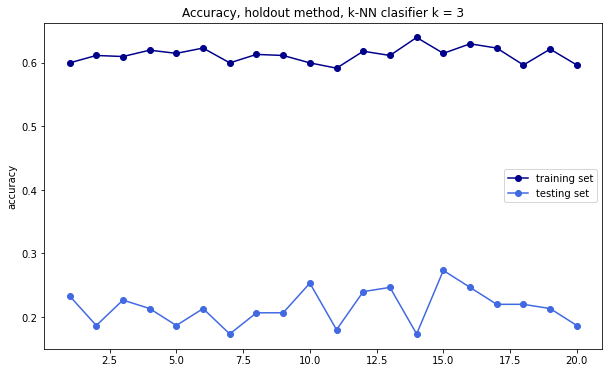

In [24]:
hold_out(k=3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


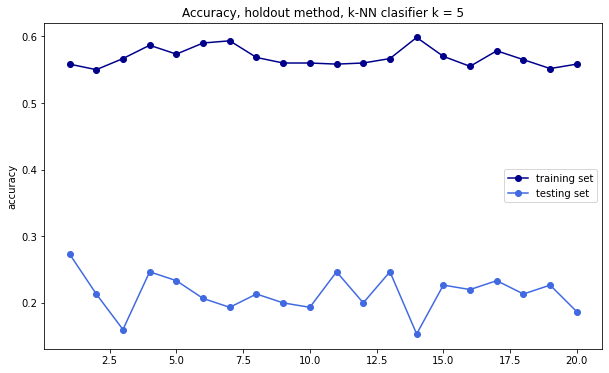

In [46]:
hold_out(k=5)

### 2. k-fold cross-validation


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


def hold_out_and_cross_val(k):
    N = 20
    accuracy_test_hold_out = np.zeros(N)
    accuracy_train_hold_out = np.zeros(N)
    accuracy_test_cross_val = np.zeros(N)

    for i in range(0, N):
        print(i)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=i, stratify=Y)
        lda = LinearDiscriminantAnalysis()
        X_lda = lda.fit(X_train, y_train)
        _sc = StandardScaler()
        _pca = PCA(n_components = 38)
        X_train_lda = _pca.fit_transform(_sc.fit_transform(X_train),y_train)
        X_test_lda = _pca.transform(_sc.transform(X_test))
      
        X_train_lda = scaler.fit_transform(X_train_lda)
        X_test_lda = scaler.transform(X_test_lda)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_lda, y_train)
        y_train_pred = knn.predict(X_train_lda)
        y_test_pred = knn.predict(X_test_lda)
        # accuracy
        accuracy_test_hold_out[i] = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        
        # perform k-fold cross-validation
        estimators = [('scaler', StandardScaler()), ('pca', PCA(n_components=38)), ('lda', LinearDiscriminantAnalysis()), ('knn', KNeighborsClassifier(n_neighbors=k))]
        pipeline = Pipeline(estimators)

        scores = cross_val_score(pipeline, X, Y, cv=5)
        accuracy_test_cross_val[i] = np.mean(scores)
        
    fig = plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, N+1, 1), accuracy_test_cross_val, 'o-', color='darkblue', label='k-fold cross-validation')
    plt.plot(np.arange(1, N+1, 1), accuracy_test_hold_out, 'o-', color='royalblue', label='hold out')
    plt.legend()
    plt.title('Accuracy on testing set, holdout and k-fold cross-validation method, k-NN clasifier k = '+str(k))
    plt.ylabel('accuracy')
    plt.savefig('knn_7.jpg', dpi=fig.dpi)
    plt.show()

In [ ]:
hold_out_and_cross_val(k=3)

0
1


In [ ]:
# hold_out_and_cross_val(k=5)

### Trade-off: complexity vs. generalization
Plotting the (validation) testing curve in order to find optimal k

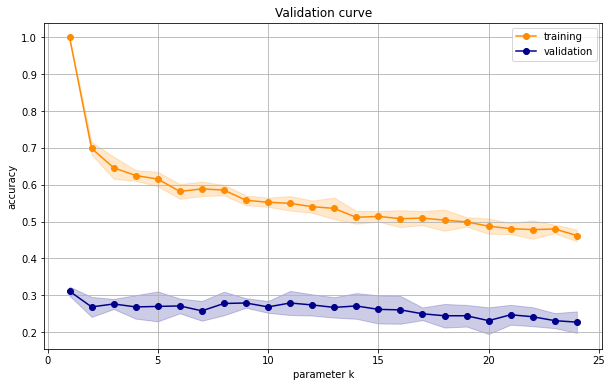

In [23]:
from sklearn.model_selection import validation_curve
# evaluate model performance using validation_curve
param_range = np.arange(1, 25)
estimators = [('scaler', StandardScaler()), ('pca', PCA(n_components=38)), ('lda', LinearDiscriminantAnalysis()), ('knn', KNeighborsClassifier(n_neighbors=k))]
pipeline = Pipeline(estimators)
train_scores, test_scores = validation_curve(
    pipeline,
    X, Y,
    param_name='knn__n_neighbors',
    param_range=param_range,
    cv=5,
    scoring='accuracy'
)

# column: score for specific fold for different k
# row: results for specific k for different folds

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, 'o-', label='training', color='darkorange')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='darkorange')
plt.plot(param_range, test_mean, 'o-', label='validation', color='darkblue')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='darkblue')

plt.title('Validation curve')
plt.xlabel('parameter k')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.savefig('knn_8.jpg', dpi=fig.dpi)
plt.show()

In [24]:
# Let's choose k=9 as optimal
# Training such classifier and evaluating 
k = 9
knn_optimal = KNeighborsClassifier(n_neighbors=k)
knn_optimal.fit(X_train_lda, y_train)

knn_evaluate_lda(knn_optimal)

########################################
Accuracy on train:  0.545
Accuracy on test:  0.25333333333333335
########################################
Recall on train:  0.5317565588006764
Recall on test:  0.2433333333333333
########################################
Precision on train:  0.6513393833262253
Precision on test:  0.2552420634920635


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
hold_out_and_cross_val(k=7)  # number of folds: 5

### Efficiency: Runtime
Total runtime for training & testing k-NN classifier (k-fold cross validation), 
- k  : 7
- cv : 5

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


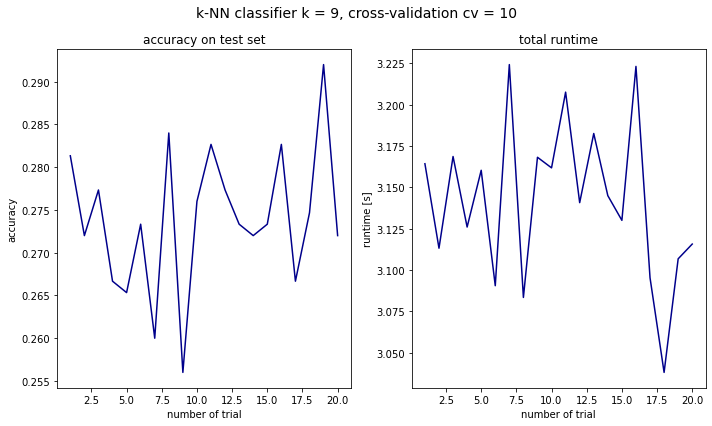

In [27]:
import time

N = 20
runtime = np.zeros(N)
acc_test = np.zeros(N)

for i in range(0, N):
    print(i)
    start_time = time.time()
    
    estimators = [('scaler', StandardScaler()), ('pca', PCA(n_components=38)), ('lda', LinearDiscriminantAnalysis()), ('knn', KNeighborsClassifier(n_neighbors=k))]
    pipeline = Pipeline(estimators)
    scores = cross_val_score(pipeline, X, Y, cv=5)
    acc_test[i] = np.mean(scores)

    end_time = time.time()

    runtime[i] = end_time - start_time
    
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, N+1), acc_test, '-', color='darkblue')
plt.ylabel('accuracy')
plt.xlabel('number of trial')
plt.title('accuracy on test set')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, N+1), runtime, '-', color='darkblue')
plt.ylabel('runtime [s]')
plt.xlabel('number of trial')
plt.title('total runtime')

plt.suptitle('k-NN classifier k = 9, cross-validation cv = 10', fontsize=14)
plt.tight_layout()

plt.show()

In [28]:
print('Mean accuracy : ', str(np.mean(acc_test)))
print('Mean runtime  : ', str(np.mean(runtime)), ' s')

Mean accuracy :  0.2739333333333333
Mean runtime  :  3.142306923866272  s


## Naive Bayes classification

### Without scaling

#### Gaussian Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and fit it to the training data
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb_model.predict(X_test)

evaluate(gnb_model, X_train=X_train, X_test=X_test)

####################
Accuracy on train: 100.00 %
Accuracy on test: 34.00 %
####################
Recall on train: 100.00 %
Recall on test: 31.33 %
####################
Precision on train: 100.00 %
Precision on test: 46.47 %


#### Bernoulli Naive Bayes:

In [146]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

# Prediction
# y_pred = bnb_model.predict(X_test)

evaluate(bnb_model, X_train=X_train, X_test=X_test)

####################
Accuracy on train: 98.33 %
Accuracy on test: 40.67 %
####################
Recall on train: 97.96 %
Recall on test: 36.67 %
####################
Precision on train: 98.99 %
Precision on test: 42.72 %


#### Multinomial Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Prediction
# y_pred = bnb_model.predict(X_test)

evaluate(mnb_model, X_train=X_train, X_test=X_test)

####################
Accuracy on train: 99.00 %
Accuracy on test: 51.33 %
####################
Recall on train: 98.70 %
Recall on test: 48.50 %
####################
Precision on train: 99.27 %
Precision on test: 52.06 %


#### Complement Naive bayes

In [148]:
from sklearn.naive_bayes import ComplementNB

cnb_model = ComplementNB()
cnb_model.fit(X_train, y_train)

evaluate(cnb_model, X_train=X_train, X_test=X_test)

####################
Accuracy on train: 100.00 %
Accuracy on test: 68.67 %
####################
Recall on train: 100.00 %
Recall on test: 67.33 %
####################
Precision on train: 100.00 %
Precision on test: 76.99 %


### Data scaling
Multinominal, complement and categorical classification do not allow negative values. Therefore scaling is tested for the dataset

In [149]:
def find_negative_columns(X):
    neg_df = X[(X < 0).any(axis=1)]
    try:
        cols_with_negatives = df.columns[df.lt(0).any()]
        #cols_with_negatives = neg_df.columns[(neg_df < 0).any()]
        print('column with negative values:', cols_with_negatives.values)
    except:
        print('there are no negative values')

find_negative_columns(X=X_train)
find_negative_columns(X=X_test)

there are no negative values
there are no negative values


In [150]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Normalize the data (mean=0 and std=1)
# norm = StandardScaler().fit(X_train)
norm = StandardScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

# Scale the data (min=0 max=1)
scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

#### Gaussian Naive Bayes

In [151]:
# Train and evaluate Gaussian Naive Bayes with scaled data
print('Gaussian Naive Bayes with min-max-scaled data:')
gnb_model_scale = GaussianNB()
gnb_model_scale.fit(X_train_scale, y_train)
evaluate(gnb_model_scale, X_train_scale, X_test_scale)
print('-'*25)
print('Gaussian Naive Bayes with normalized data:')
gnb_model_norm = GaussianNB()
gnb_model_norm.fit(X_train_norm, y_train)
evaluate(gnb_model_norm, X_train_norm, X_test_norm)


Gaussian Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 100.00 %
Accuracy on test: 32.67 %
####################
Recall on train: 100.00 %
Recall on test: 30.67 %
####################
Precision on train: 100.00 %
Precision on test: 35.13 %
-------------------------
Gaussian Naive Bayes with normalized data:
####################
Accuracy on train: 100.00 %
Accuracy on test: 31.33 %
####################
Recall on train: 100.00 %
Recall on test: 30.17 %
####################
Precision on train: 100.00 %
Precision on test: 38.76 %


#### Bernoulli Naive Bayes

In [152]:
# Train and evaluate Bernoulli Naive Bayes with scaled data
print('Bernoulli Naive Bayes with min-max-scaled data:')
bnb_model_scale = BernoulliNB()
bnb_model_scale.fit(X_train_scale, y_train)
evaluate(bnb_model_scale, X_train_scale, X_test_scale)
print('-'*25)
print('Bernoulli Naive Bayes with normalized data:')
bnb_model_norm = BernoulliNB()
bnb_model_norm.fit(X_train_norm, y_train)
evaluate(bnb_model_norm, X_train_norm, X_test_norm)

Bernoulli Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 98.33 %
Accuracy on test: 40.67 %
####################
Recall on train: 97.96 %
Recall on test: 36.67 %
####################
Precision on train: 98.99 %
Precision on test: 42.72 %
-------------------------
Bernoulli Naive Bayes with normalized data:
####################
Accuracy on train: 97.00 %
Accuracy on test: 40.00 %
####################
Recall on train: 96.46 %
Recall on test: 35.83 %
####################
Precision on train: 98.56 %
Precision on test: 43.87 %


#### Multinomial Naive Bayes:

In [153]:
print(X_train_norm.min())
print(X_test_norm.min())

-3.104568507927859
-3.1511401403222696


In [154]:
# Train a Multinomial Naive Bayes classifier on the training data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

#mnb_model = MultinomialNB()
#mnb_model.fit(X_train, y_train)

# Train and evaluate Gaussian Naive Bayes with scaled data
print('Multinominal Naive Bayes with min-max-scaled data:')
mnb_model_scale = MultinomialNB()
mnb_model_scale.fit(X_train_scale, y_train)
evaluate(mnb_model_scale, X_train_scale, X_test_scale)

print('normalization led to negative features')
# print('Multinominal Naive Bayes with normalized data:')
# mnb_model_norm = MultinomialNB()
# mnb_model_norm.fit(X_train_norm, y_train)
# evaluate(mnb_model_norm, X_train_norm, X_test_norm)

Multinominal Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 99.67 %
Accuracy on test: 37.33 %
####################
Recall on train: 99.43 %
Recall on test: 34.67 %
####################
Precision on train: 99.78 %
Precision on test: 46.70 %
normalization led to negative features


#### Complement Naive Bayes:

In [155]:
from sklearn.naive_bayes import ComplementNB

# Train and evaluate Gaussian Naive Bayes with scaled data
print('Complement Naive Bayes with min-max-scaled data:')
cnb_model_scale = ComplementNB()
cnb_model_scale.fit(X_train_scale, y_train)
evaluate(cnb_model_scale, X_train_scale, X_test_scale)

Complement Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 99.83 %
Accuracy on test: 66.67 %
####################
Recall on train: 99.71 %
Recall on test: 66.17 %
####################
Precision on train: 99.87 %
Precision on test: 72.76 %


#### Grid search to improve Gaussian naive bayes

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gnb', GaussianNB())
])

param_grid={'gnb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search_gnb_model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search_gnb_model.fit(X_train, y_train)


print('Best hyperparameters: {}'.format(grid_search_gnb_model.best_params_))
print('Best mean cross-validation score: {:.2f} %'.format(grid_search_gnb_model.best_score_*100))

evaluate(grid_search_gnb_model, X_train_scale, X_test_scale)

Best hyperparameters: {'gnb__var_smoothing': 1e-09}
Best mean cross-validation score: 33.33 %


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


####################
Accuracy on train: 100.00 %
Accuracy on test: 28.00 %
####################
Recall on train: 100.00 %
Recall on test: 26.33 %
####################
Precision on train: 100.00 %
Precision on test: 30.59 %


### Plot results in LaTex table format

In [157]:
def generate_latex_table_str(model, name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_hat)
    recall = recall_score(y_test, y_test_hat, average='macro', zero_division=0)
    precision = precision_score(y_test, y_test_hat, average='macro', zero_division=0)
    
    print(' {} & {:.2f} \% & {:.2f} \% & {:.2f} \% \{}'.format(name, accuracy*100, recall*100, precision*100, '\\'))
    print(' \hline')

In [158]:
generate_latex_table_str(gnb_model, 'Gaussian Naive Bayes')
generate_latex_table_str(bnb_model, 'Bernoulli NB')
generate_latex_table_str(mnb_model, 'Multinomial NB')
generate_latex_table_str(cnb_model, 'Complement NB')
generate_latex_table_str(gnb_model_scale, 'Gaussian NB (scaled)', X_train=X_train_scale, X_test=X_test_scale)
generate_latex_table_str(gnb_model_norm, 'Gaussian NB (norm)', X_train=X_train_norm, X_test=X_test_norm)
generate_latex_table_str(bnb_model_scale, 'Bernoulli NB (scaled)', X_train=X_train_scale, X_test=X_test_scale)
generate_latex_table_str(bnb_model_norm, 'Bernoulli NB (norm)', X_train=X_train_norm, X_test=X_test_norm)
generate_latex_table_str(mnb_model_scale, 'Multinomial NB (scaled)', X_train=X_train_scale, X_test=X_test_scale)
generate_latex_table_str(cnb_model_scale, 'Complement NB (scaled)', X_train=X_train_scale, X_test=X_test_scale)
generate_latex_table_str(grid_search_gnb_model, 'Gaussian NB HP tuned')


 Gaussian Naive Bayes & 34.00 \% & 31.33 \% & 46.47 \% \\
 \hline
 Bernoulli NB & 40.67 \% & 36.67 \% & 42.72 \% \\
 \hline
 Multinomial NB & 51.33 \% & 48.50 \% & 52.06 \% \\
 \hline
 Complement NB & 68.67 \% & 67.33 \% & 76.99 \% \\
 \hline
 Gaussian NB (scaled) & 32.67 \% & 30.67 \% & 35.13 \% \\
 \hline
 Gaussian NB (norm) & 31.33 \% & 30.17 \% & 38.76 \% \\
 \hline
 Bernoulli NB (scaled) & 40.67 \% & 36.67 \% & 42.72 \% \\
 \hline
 Bernoulli NB (norm) & 40.00 \% & 35.83 \% & 43.87 \% \\
 \hline
 Multinomial NB (scaled) & 37.33 \% & 34.67 \% & 46.70 \% \\
 \hline
 Complement NB (scaled) & 66.67 \% & 66.17 \% & 72.76 \% \\
 \hline
 Gaussian NB HP tuned & 32.67 \% & 30.67 \% & 35.13 \% \\
 \hline


### lda dataset without scaling

In [159]:
X_train_lda

array([[ 16.51075992,  -5.3173142 ,  -1.19276859, ...,   0.17386203,
         -1.00407609,  -3.96912154],
       [ -3.86188632,  18.87149957,   7.36295959, ...,   1.88449615,
         -3.67342406,  -3.7814875 ],
       [  6.15151337,   2.75579554,  14.27639787, ...,   8.79311921,
        -11.29402979,  -2.74648933],
       ...,
       [ 16.4545035 , -14.97611136,  -3.7385572 , ...,   2.53388214,
         -2.65285062,  -1.84887836],
       [-14.86556262,  -8.29080213,  -6.10897784, ...,   2.28497687,
          1.52557498,  -6.87181228],
       [ -8.22119492,  22.18875758,  -1.50819297, ...,   2.6348996 ,
        -12.38538994,  22.61194705]])

#### Gaussian Naive Bayes

In [160]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier and fit it to the training data
gnb_model_lda = GaussianNB()
gnb_model_lda.fit(X_train_lda, y_train)

# Make predictions on the testing data
y_pred = gnb_model_lda.predict(X_test_lda)

evaluate(gnb_model_lda, X_train=X_train_lda, X_test=X_test_lda)

####################
Accuracy on train: 75.17 %
Accuracy on test: 29.33 %
####################
Recall on train: 75.32 %
Recall on test: 28.33 %
####################
Precision on train: 81.89 %
Precision on test: 32.48 %


#### Bernoulli Naive Bayes

In [161]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

bnb_model_lda = BernoulliNB()
bnb_model_lda.fit(X_train_lda, y_train)

# Prediction
# y_pred = bnb_model.predict(X_test)

evaluate(bnb_model_lda, X_train=X_train_lda, X_test=X_test_lda)

####################
Accuracy on train: 72.50 %
Accuracy on test: 43.33 %
####################
Recall on train: 72.71 %
Recall on test: 43.17 %
####################
Precision on train: 72.81 %
Precision on test: 43.81 %


### lda dataset + scaling
Multinominal, complement and categorical classification do not allow negative values. Therefore scaling is tested for the dataset

In [162]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Normalize the data (mean=0 and std=1)
# norm = StandardScaler().fit(X_train)
norm = StandardScaler()
X_train_norm_lda = norm.fit_transform(X_train_lda)
X_test_norm_lda = norm.transform(X_test_lda)

# Scale the data (min=0 max=1)
scale = MinMaxScaler()
X_train_scale_lda = scale.fit_transform(X_train_lda)
X_test_scale_lda = scale.transform(X_test_lda)

#### Gaussian Naive Bayes

In [163]:
# Train and evaluate Gaussian Naive Bayes with scaled data
print('Gaussian Naive Bayes with min-max-scaled data:')
gnb_model_scale_lda = GaussianNB()
gnb_model_scale_lda.fit(X_train_scale_lda, y_train)
evaluate(gnb_model_scale_lda, X_train_scale_lda, X_test_scale_lda)
print('-'*25)
print('Gaussian Naive Bayes with normalized data:')
gnb_model_norm_lda = GaussianNB()
gnb_model_norm_lda.fit(X_train_norm_lda, y_train)
evaluate(gnb_model_norm_lda, X_train_norm_lda, X_test_norm_lda)


Gaussian Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 75.17 %
Accuracy on test: 29.33 %
####################
Recall on train: 75.32 %
Recall on test: 28.33 %
####################
Precision on train: 81.89 %
Precision on test: 32.48 %
-------------------------
Gaussian Naive Bayes with normalized data:
####################
Accuracy on train: 75.17 %
Accuracy on test: 29.33 %
####################
Recall on train: 75.32 %
Recall on test: 28.33 %
####################
Precision on train: 81.89 %
Precision on test: 32.48 %


#### Bernoulli Naive Bayes

In [164]:
# Train and evaluate Bernoulli Naive Bayes with scaled data
print('Bernoulli Naive Bayes with min-max-scaled data:')
bnb_model_scale_lda = BernoulliNB()
bnb_model_scale_lda.fit(X_train_scale_lda, y_train)
evaluate(bnb_model_scale_lda, X_train_scale_lda, X_test_scale_lda)
print('-'*25)
print('Bernoulli Naive Bayes with normalized data:')
bnb_model_norm_lda = BernoulliNB()
bnb_model_norm_lda.fit(X_train_norm_lda, y_train)
evaluate(bnb_model_norm_lda, X_train_norm_lda, X_test_norm_lda)

Bernoulli Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 5.50 %
Accuracy on test: 2.67 %
####################
Recall on train: 4.35 %
Recall on test: 2.00 %
####################
Precision on train: 20.06 %
Precision on test: 0.05 %
-------------------------
Bernoulli Naive Bayes with normalized data:
####################
Accuracy on train: 72.50 %
Accuracy on test: 43.33 %
####################
Recall on train: 72.71 %
Recall on test: 43.17 %
####################
Precision on train: 72.81 %
Precision on test: 43.81 %


#### Multinomial Naive Bayes:

In [165]:
print(X_train_norm.min())
print(X_test_norm.min())

-3.104568507927859
-3.1511401403222696


In [166]:
# Train a Multinomial Naive Bayes classifier on the training data
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

#mnb_model = MultinomialNB()
#mnb_model.fit(X_train, y_train)

# Train and evaluate Gaussian Naive Bayes with scaled data
print('Multinominal Naive Bayes with min-max-scaled data:')
mnb_model_scale_lda = MultinomialNB()
mnb_model_scale_lda.fit(X_train_scale_lda, y_train)
evaluate(mnb_model_scale_lda, X_train_scale_lda, X_test_scale_lda)

print('normalization led to negative features')
# print('Multinominal Naive Bayes with normalized data:')
# mnb_model_norm = MultinomialNB()
# mnb_model_norm.fit(X_train_norm, y_train)
# evaluate(mnb_model_norm, X_train_norm, X_test_norm)

Multinominal Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 26.33 %
Accuracy on test: 12.67 %
####################
Recall on train: 22.27 %
Recall on test: 10.00 %
####################
Precision on train: 49.02 %
Precision on test: 9.40 %
normalization led to negative features


#### Complement Naive Bayes:

In [167]:
from sklearn.naive_bayes import ComplementNB

# Train and evaluate Gaussian Naive Bayes with scaled data
print('Complement Naive Bayes with min-max-scaled data:')
cnb_model_scale_lda = ComplementNB()
cnb_model_scale_lda.fit(X_train_scale_lda, y_train)
evaluate(cnb_model_scale_lda, X_train_scale_lda, X_test_scale_lda)

Complement Naive Bayes with min-max-scaled data:
####################
Accuracy on train: 60.67 %
Accuracy on test: 43.33 %
####################
Recall on train: 59.14 %
Recall on test: 42.83 %
####################
Precision on train: 66.48 %
Precision on test: 38.69 %


### Plot results in LaTex table format

In [168]:
generate_latex_table_str(gnb_model_lda, 'Gaussian NB LDA')
generate_latex_table_str(bnb_model_lda, 'Bernoulli NB LDA')
generate_latex_table_str(gnb_model_scale_lda, 'Gaussian NB (scaled) LDA', X_train=X_train_scale_lda, X_test=X_test_scale_lda)
generate_latex_table_str(gnb_model_norm_lda, 'Gaussian NB (norm) LDA', X_train=X_train_norm_lda, X_test=X_test_norm_lda)
generate_latex_table_str(bnb_model_scale_lda, 'Bernoulli NB (scaled) LDA', X_train=X_train_scale_lda, X_test=X_test_scale_lda)
generate_latex_table_str(bnb_model_norm_lda, 'Bernoulli NB (norm) LDA', X_train=X_train_norm_lda, X_test=X_test_norm_lda)
generate_latex_table_str(mnb_model_scale_lda, 'Multinomial NB (scaled) LDA', X_train=X_train_scale_lda, X_test=X_test_scale_lda)
generate_latex_table_str(cnb_model_scale_lda, 'Complement NB (scaled) LDA', X_train=X_train_scale_lda, X_test=X_test_scale_lda)


 Gaussian NB LDA & 34.00 \% & 31.33 \% & 46.47 \% \\
 \hline
 Bernoulli NB LDA & 40.67 \% & 36.67 \% & 42.72 \% \\
 \hline
 Gaussian NB (scaled) LDA & 29.33 \% & 28.33 \% & 32.48 \% \\
 \hline
 Gaussian NB (norm) LDA & 29.33 \% & 28.33 \% & 32.48 \% \\
 \hline
 Bernoulli NB (scaled) LDA & 2.67 \% & 2.00 \% & 0.05 \% \\
 \hline
 Bernoulli NB (norm) LDA & 43.33 \% & 43.17 \% & 43.81 \% \\
 \hline
 Multinomial NB (scaled) LDA & 12.67 \% & 10.00 \% & 9.40 \% \\
 \hline
 Complement NB (scaled) LDA & 43.33 \% & 42.83 \% & 38.69 \% \\
 \hline
